## Churn model - regression logistic

### Imports

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [33]:
df = pd.read_csv('../database/processed/netflix_users_processed_t100.csv')
#print(df.head())

In [39]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      3766
           1       0.69      0.94      0.80      1234

    accuracy                           0.88      5000
   macro avg       0.84      0.90      0.86      5000
weighted avg       0.91      0.88      0.89      5000



<Figure size 1000x600 with 0 Axes>

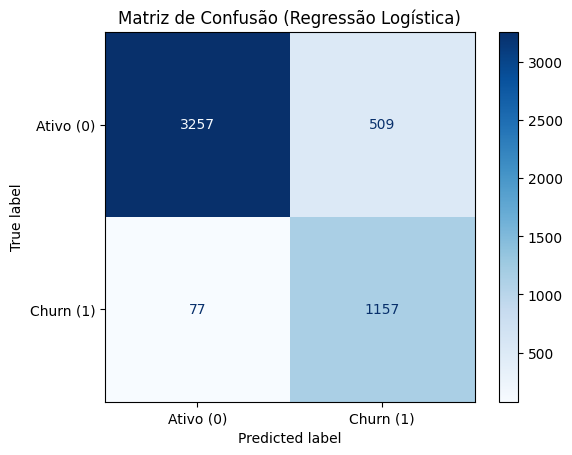

In [ ]:
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    display_labels=['Ativo (0)', 'Churn (1)'],
    cmap='Blues', 
    values_format='d' 
)
plt.title("Matriz de Confusão (Regressão Logística)")
plt.grid(False) 
plt.show()

##### O modelo está acertando quase todos os usuários que deram churn, mas o número de falsos-positivos é um pouco grande.